<a href="https://colab.research.google.com/github/sanu1230/Professional_Projects/blob/master/COVID19_Cases_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID19 Cases in India

## Task

**To find insights from the data**

## Attribute

- Sno - Serial number
- Date -  Date of diagnoses
- State/UnionTerritory
- ConfirmedIndianNational 
- ConfirmedForeignNational
- Cured
- Deaths
- Confirmed - confirmed positive


## Loading necessary packages

In [2]:
!pip -q install pandas_profiling==2.5.0

     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 8.8MB/s 
     |████████████████████████████████| 133kB 42.1MB/s 
     |████████████████████████████████| 614kB 35.2MB/s 
     |████████████████████████████████| 1.5MB 34.9MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 256kB 42.2MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 327kB 47.8MB/s 
     |████████████████████████████████| 215kB 38.6MB/s 
     |████████████████████████████████| 51kB 883kB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 747kB 33.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.22.0 

In [1]:
!pip freeze | grep pandas

pandas==0.25.3
pandas-datareader==0.8.1
pandas-gbq==0.11.0
pandas-profiling==2.5.0
sklearn-pandas==1.8.0


In [2]:
!pip -q install imgaug==0.2.6
!pip -q install lime
!pip -q install shap
!pip -q install eli5

     |████████████████████████████████| 634kB 2.8MB/s 
     |████████████████████████████████| 276kB 2.8MB/s 
     |████████████████████████████████| 276kB 2.8MB/s 
     |████████████████████████████████| 112kB 2.8MB/s 


In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import pandas_profiling
from IPython.display import display, HTML, IFrame

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
# This is our main dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML Projects/My Projects/COVID19 INDIA/Covid_19_India/covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,1/2/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,3/2/2020,6:00 PM,Kerala,3,0,0,0,3


In [6]:
df.shape

(3351, 9)

In [7]:
df1 = df.copy()

In [207]:
df = df1.copy()

# Data Cleaning

In [208]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [209]:
#@title Changing columns names

In [210]:
df.columns = ['sr', 'date', 'time', 'state', 'is_indian', 'is_foreigner', 'cured', 'deaths', 'positive']
df.columns

Index(['sr', 'date', 'time', 'state', 'is_indian', 'is_foreigner', 'cured',
       'deaths', 'positive'],
      dtype='object')

In [211]:
df.state.value_counts()

Kerala                                      146
Delhi                                       114
Rajasthan                                   113
Uttar Pradesh                               112
Haryana                                     112
Tamil Nadu                                  109
Ladakh                                      109
Karnataka                                   107
Maharashtra                                 107
Punjab                                      107
Jammu and Kashmir                           107
Andhra Pradesh                              104
Telengana                                   102
Uttarakhand                                 101
Odisha                                      100
Puducherry                                   98
West Bengal                                  98
Chhattisgarh                                 97
Chandigarh                                   97
Gujarat                                      96
Madhya Pradesh                          

In [212]:
# Above we see that there are few values which are not states and some are reapeted
# Unassigned &  Cases being reassigned to states are not states, hence lets drop them
# Lets merge 'Dadar Nagar Haveli & 'Daman & Diu' in 'Dadra and Nagar Haveli and Daman and Diu'

df['state'] = df.state.replace({'Dadar Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu'})
df['state'] = df.state.replace({'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu'})

df['state'] = df.state.replace({'Cases being reassigned to states': np.nan})
df['state'] = df.state.replace({'Unassigned': np.nan})

df['state'].value_counts()

Kerala                                      146
Delhi                                       114
Rajasthan                                   113
Uttar Pradesh                               112
Haryana                                     112
Tamil Nadu                                  109
Ladakh                                      109
Maharashtra                                 107
Karnataka                                   107
Jammu and Kashmir                           107
Punjab                                      107
Andhra Pradesh                              104
Telengana                                   102
Uttarakhand                                 101
Odisha                                      100
Puducherry                                   98
West Bengal                                  98
Chhattisgarh                                 97
Chandigarh                                   97
Gujarat                                      96
Madhya Pradesh                          

In [213]:
#@title Missing values
df.isna().sum()

sr               0
date             0
time             0
state           38
is_indian        0
is_foreigner     0
cured            0
deaths           0
positive         0
dtype: int64

In [214]:
df.is_indian.unique()

array(['1', '2', '3', '0', '6', '7', '8', '9', '4', '15', '5', '17', '10',
       '11', '19', '14', '22', '32', '12', '23', '24', '36', '25', '39',
       '44', '18', '16', '26', '49', '33', '60', '13', '28', '45', '64',
       '21', '29', '71', '30', '37', '87', '86', '41', '101', '125', '34',
       '35', '42', '55', '110', '20', '121', '40', '129', '127', '38',
       '168', '177', '52', '46', '54', '-'], dtype=object)

In [215]:
# There is a '-' value in feature is_indian which means missing value

In [216]:
df.is_indian.value_counts()

-      2905
1       108
3        73
2        33
4        21
       ... 
101       1
54        1
121       1
177       1
86        1
Name: is_indian, Length: 62, dtype: int64

In [217]:
# We see '-' missing value is more 90%

In [218]:
df.is_foreigner.unique()

array(['0', '1', '2', '14', '3', '9', '7', '11', '10', '8', '6', '-'],
      dtype=object)

In [219]:
# There is a '-' value in feature is_foreigner which needs to be dropped 

In [220]:
df.is_foreigner.value_counts()

-     2905
0      314
1       39
2       36
14      25
3       12
10       6
8        5
6        3
7        3
11       2
9        1
Name: is_foreigner, dtype: int64

In [221]:
# We see '-' missing value is more 90%

In [222]:
# We see that is_indian and is_foreigner which provided data on how many Indian or Foreigners are effected has 
# missing values more then 90%, hence lets drop the features

df = df.drop(['is_indian', 'is_foreigner'], axis=1)
df.shape

(3351, 7)

In [223]:
# Lest drop nan values
df = df.dropna()
df.shape

(3313, 7)

In [224]:
df2 = df.copy()

In [232]:
df = df2.copy()

## Feature Engineering

In [233]:
# Lets work in the date feature
# The date feature has few values with 2 digit day and month (ex- 01 & 1) and some has 1 digit values
# The year has few values of 4 digits YYYY and few with 2 digits YY
# Hence dorectly applying the pd.datetime function will create different dates which are actually not there in the database (bug)
# so we will split the string date into day, month & year and then convert them to int

# Splitting the string data
new_date = df['date'].str.split('/', 2, expand=True)
df['day'] = new_date[0]
df['month']= new_date[1]
df['year'] = new_date[2]

# Comnverting data type
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

df.head()

,sr,date,time,state,cured,deaths,positive,day,month,year
0,1,30/01/20,6:00 PM,Kerala,0,0,1,30,1,20
1,2,31/01/20,6:00 PM,Kerala,0,0,1,31,1,20
2,3,1/2/2020,6:00 PM,Kerala,0,0,2,1,2,2020
3,4,2/2/2020,6:00 PM,Kerala,0,0,3,2,2,2020
4,5,3/2/2020,6:00 PM,Kerala,0,0,3,3,2,2020


In [234]:
# Lets equilize the year column

df['year'] = df['year'].apply(lambda x: 2020 if x < 30 else 2020 )
df['year'].values

array([2020, 2020, 2020, ..., 2020, 2020, 2020])

In [235]:
# Now all the values in the year column is 2020
# Now to get the month name , lets merge the day, month and year to make ot datetime

df['date'] = pd.to_datetime(df[['day', 'month', 'year']])
df['Month'] = df['date'].dt.month_name()

# Lets drop day, month and year, since we have corrected date colum now
df = df.drop(['day', 'month', 'year'], axis=1)

df.head()

,sr,date,time,state,cured,deaths,positive,Month
0,1,2020-01-30,6:00 PM,Kerala,0,0,1,January
1,2,2020-01-31,6:00 PM,Kerala,0,0,1,January
2,3,2020-02-01,6:00 PM,Kerala,0,0,2,February
3,4,2020-02-02,6:00 PM,Kerala,0,0,3,February
4,5,2020-02-03,6:00 PM,Kerala,0,0,3,February


### Converting Data Type

In [236]:
# Lets start by converting the data type to its correct 

# state & time to be converted to category

df['state'] = df['state'].astype('category')
df['time'] = df['time'].astype('category')

df.head()

,sr,date,time,state,cured,deaths,positive,Month
0,1,2020-01-30,6:00 PM,Kerala,0,0,1,January
1,2,2020-01-31,6:00 PM,Kerala,0,0,1,January
2,3,2020-02-01,6:00 PM,Kerala,0,0,2,February
3,4,2020-02-02,6:00 PM,Kerala,0,0,3,February
4,5,2020-02-03,6:00 PM,Kerala,0,0,3,February


In [238]:
# Now lets convert Month to category  for data visulization pourpose

df['Month'] = df['Month'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3313 entries, 0 to 3349
Data columns (total 8 columns):
sr          3313 non-null int64
date        3313 non-null datetime64[ns]
time        3313 non-null category
state       3313 non-null category
cured       3313 non-null int64
deaths      3313 non-null int64
positive    3313 non-null int64
Month       3313 non-null category
dtypes: category(3), datetime64[ns](1), int64(4)
memory usage: 167.1 KB


# Observation: 

In the above data we see that the feartue 'positive' shows total number of positive cases up until a particular date, hence which means, at the end of every month, it will show the total number of positive cases, total cured and total deaths.

So to further analysis, we would take only the data of the last day of each month.

In [239]:
jan = df[df['date']=='2020-01-31']
feb = df[df['date']=='2020-02-29']
mar = df[df['date']=='2020-03-31']
apr = df[df['date']=='2020-04-30']
may = df[df['date']=='2020-05-31']
jun = df[df['date']=='2020-06-22']

frame = [jan, feb, mar, apr, may, jun]

df = pd.concat(frame)

df.date.unique()

array(['2020-01-31T00:00:00.000000000', '2020-02-29T00:00:00.000000000',
       '2020-03-31T00:00:00.000000000', '2020-04-30T00:00:00.000000000',
       '2020-05-31T00:00:00.000000000', '2020-06-22T00:00:00.000000000'],
      dtype='datetime64[ns]')


# Data Visualization

## Number of Cases each month

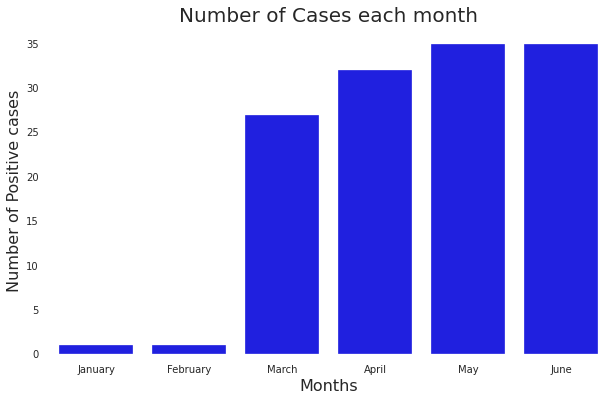

In [240]:
# Lets check the number of cases each month

f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df.Month.unique(), y=df.Month.value_counts().sort_values(ascending=True), data=df, color= 'blue')
ax.set_title('Number of Cases each month', fontsize= 20)
ax.set_xlabel('Months', fontsize=16)
ax.set_ylabel('Number of Positive cases', fontsize=16)
plt.show()

**Observation** As per the data we see that there were hardly 1 or 2 cases tested or diagnosed till February 2020. However,the real testing started in the month of March 2020 and we can also see a jump in the number of positive cases in the month of April 2020.

## Number of Cases Statewise in the month April 2020

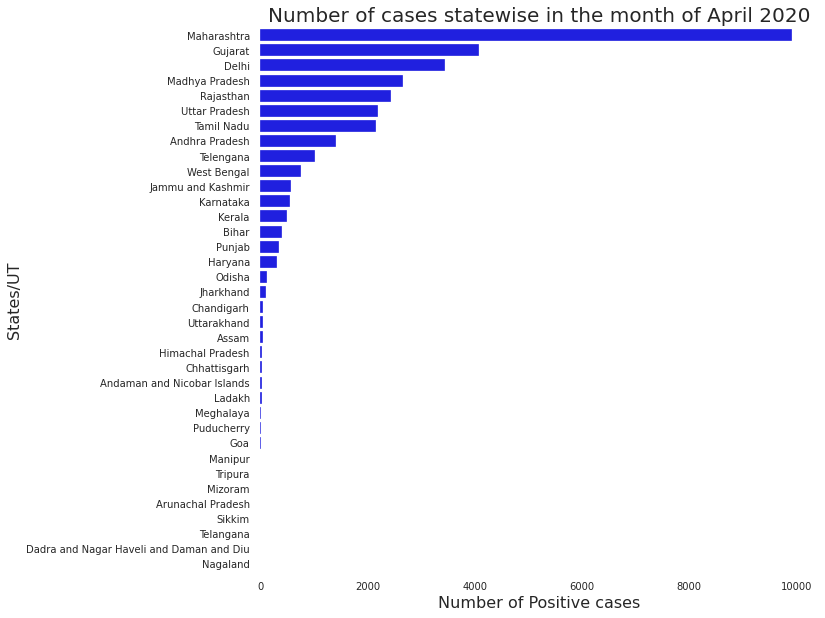

In [241]:
# Lets check the number of cases statewise in the month of April 2020

#Lets create a new dataframe only for the month of April2020
df_April = df[df['Month']=='April']

# Creting a new dataframe with groupby
df_April_State = df_April.groupby(['state'], as_index=False)['positive'].agg('sum').sort_values('positive', ascending=False)

# Lets plot the new dataframe
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='positive', y='state',
            order=df_April_State['state'], data=df_April_State, color= 'blue', ax=ax)
ax.set_title('Number of cases statewise in the month of April 2020', fontsize= 20)
ax.set_ylabel('States/UT', fontsize=16)
ax.set_xlabel('Number of Positive cases', fontsize=16)
plt.close(2)
plt.show()

## Number of cases cured in each state



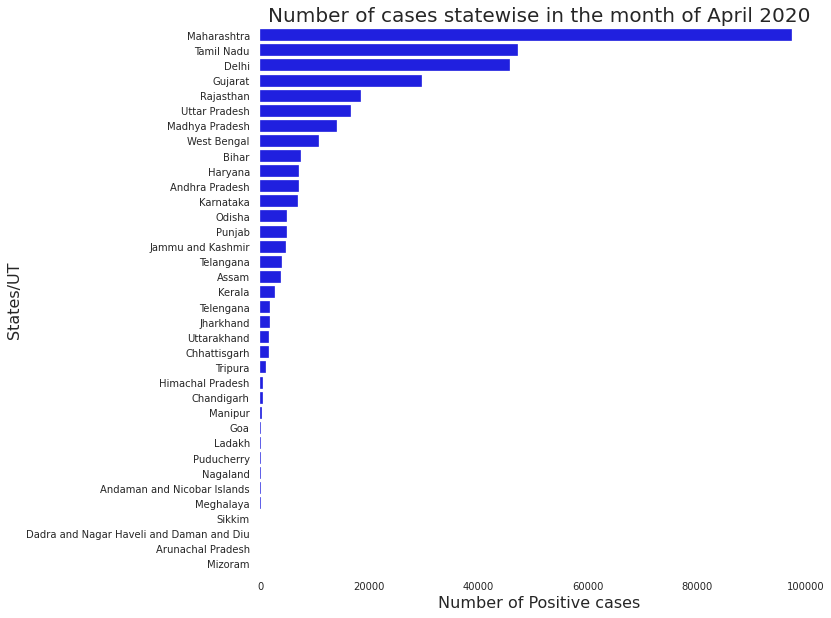

In [242]:
df_cured = df.groupby(df['state'], as_index=False)['cured'].agg('sum').sort_values('cured', ascending=False)

plt.figure(figsize=(10, 10))

sns.barplot(x='cured', y='state', order=df_cured['state'], data=df_cured, color='blue')
plt.title('Number of cases statewise in the month of April 2020', fontsize= 20)
plt.ylabel('States/UT', fontsize=16)
plt.xlabel('Number of Positive cases', fontsize=16)
plt.show()

## Current status of Covid 19 in India

In [243]:
# Current Status
positive = df['positive'].sum()
cured = df['cured'].sum()
deaths =df['deaths'].sum()
data_pie = [positive, cured, deaths]
plt.figure(figsize=(6, 6))
fig = px.pie(data_frame= df, values=data_pie, names=['Positive Cases', 'Cured People', 'Deaths'],
             title= 'Currrent status of Covid19 India')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


<Figure size 432x432 with 0 Axes>

## Most number of cases/cure/deaths on Monthly basis

In [244]:
# Monthwise graph of Number of positive cases found in last 6 months
df_month = df.groupby(df['Month'], as_index=False)['positive', 'cured', 'deaths'].agg('sum').sort_values(by='positive', ascending=True)

px.bar(df_month, x='Month', y='positive', color='Month', 
          labels={'positive': 'Positive cases', 'cured': 'People cured', 'deaths': 'Deaths occured'},
          hover_data= ['positive', 'cured', 'deaths'], title='Most number of cases/cure/deaths on Monthly basis', log_y=True)

# Conclusion

With the data above we can see the increase in the number of cases in last 6 months, based on states & months. We are also able to how the number of test increased in the later months. However, the data does not have much information to to further analysis or do prediction. 

Many important information such as individual info, date, time & month of detection and date, time of patient cured, or did not survive etc are missing. 

Moreover symptoms of paitents, their recovery pattern can help in predict of new patient data..